In [1]:
import pandas as pd
import os
IMPACT_CWD=os.path.expanduser("~")+"/Downloads/synapsology"+"/" 
input_book = pd.ExcelFile(IMPACT_CWD+'心理検査DB_差分入り.xlsx')
input_exc = pd.ExcelFile(IMPACT_CWD+'Synapsology.運動習慣.xlsx')
result_lh_df = pd.read_table(IMPACT_CWD+"lh.thick.spc.csv", delim_whitespace=True)
result_rh_df = pd.read_table(IMPACT_CWD+"rh.thick.spc.csv", delim_whitespace=True)

# 手動で取り除くIDを指定
IDsQCfailed=[]
IDsQCfailed=IDsQCfailed+["U28021"] # NGのID ハズレ値（highグループの70歳：U28021）
# niftiファイルの無いIDは、spcファイルをmergeした時に自動で取り除かれるが、
# spcファイルを自動生成する場合はあらかじめ手動で取り除く必要がある
#IDsQCfailed=IDsQCfailed+["MR0011_0681","MR0011_0787","MR0011_0793"] # niftiファイルの無いID
print("取り除くID:",IDsQCfailed)

取り除くID: ['U28021']


In [2]:
#sheet_namesメソッドでExcelブック内の各シートの名前をリストで取得できる
input_sheet_name = input_book.sheet_names
exc_sheet_name = input_exc.sheet_names

#DataFrameとして一つ目のsheetを読込
exc_sheet_df = input_exc.parse(exc_sheet_name[0])
exc_sheet_df=exc_sheet_df.drop(exc_sheet_df.columns[[2,3,4]],axis=1)
exc_sheet_df.loc[(exc_sheet_df[exc_sheet_df.columns[2]] == 0), exc_sheet_df.columns[2]] = 0
exc_sheet_df.loc[(exc_sheet_df[exc_sheet_df.columns[2]] > 0) & (exc_sheet_df[exc_sheet_df.columns[2]] < 5), exc_sheet_df.columns[2]] = 1
exc_sheet_df.loc[(exc_sheet_df[exc_sheet_df.columns[2]] >= 5), exc_sheet_df.columns[2]] = 2

In [3]:
#DataFrameとして一つ目のsheetを読込
fu_sheet_df = input_book.parse(input_sheet_name[0])
fu_sheet_df=fu_sheet_df[fu_sheet_df[fu_sheet_df.columns[0]].str.contains("",na=False)]

#読み込んだシート名の確認
print("Sheet name:", input_sheet_name[0])

fu_sheet_df=fu_sheet_df.iloc[:,0:24]
fu_sheet_df=fu_sheet_df.drop(fu_sheet_df.columns[[21,22]],axis=1)
#読み込んだシートの先頭5行を表示
#print(fu_sheet_df.shape)
print(fu_sheet_df.head(5))

Sheet name: follow_without29
     研究ID        検査日    年齢  性別\n1：男性\n２：女性  TMT-A\n（秒）  TMT-B\n（秒）  TMT\nB-A  \
0  U28001 2016-12-08  64.0             2.0        73.0        84.0      11.0   
1  U28002 2016-11-25  64.0             2.0        75.0        94.0      19.0   
2  U28003 2016-12-09  63.0             2.0        77.0        93.0      16.0   
3  U28004 2016-12-13  63.0             2.0        49.0       122.0      73.0   
4  U28005 2016-12-16  58.0             2.0        54.0        98.0      44.0   

   TMT\nB/A   CA  NUCA  ...  PEN  EEPM  EEPN  MSC  DMS   UE   BR  %PEM  %PEN  \
0  1.150685  6.0   1.0  ...  0.0   8.0   8.0  4.0  0.0  0.0  0.0   0.0   0.0   
1  1.253333  4.0   2.0  ...  6.0  20.0  18.0  3.0  0.0  0.0  0.0  16.6  25.0   
2  1.207792  6.0   1.0  ...  0.0   8.0   8.0  4.0  0.0  0.0  0.0   0.0   0.0   
3  2.489796  5.0   2.0  ...  1.0  11.0  11.0  5.0  1.0  0.0  0.0   8.3   8.3   
4  1.814815  5.0   5.0  ...  2.0  14.0  13.0  2.0  0.0  1.0  0.0   6.6  13.3   

   反応時間計_

In [4]:
#DataFrameとして3つ目のsheetを読込（グラフはsheetとしてカウントされない？）
bl_sheet_df = input_book.parse(input_sheet_name[1])
bl_sheet_df=bl_sheet_df[bl_sheet_df[bl_sheet_df.columns[0]].str.contains("",na=False)]

#読み込んだシート名の確認
print("Sheet name:", input_sheet_name[1])

bl_sheet_df=bl_sheet_df.drop(bl_sheet_df.columns[[21,23,27,28]],axis=1)
#読み込んだシートの先頭5行を表示
print(bl_sheet_df.shape)#head(5))

Sheet name: baseline_without29
(51, 29)


In [5]:
bl_fu_sheet_df=pd.merge(bl_sheet_df, fu_sheet_df, left_on=bl_sheet_df.columns[0], right_on=fu_sheet_df.columns[0], how="inner", suffixes = ["_bl", "_fu"])
bl_fu_sheet_df.columns=bl_fu_sheet_df.columns.str.replace(" ","_")
bl_fu_sheet_df.columns=bl_fu_sheet_df.columns.str.replace("\n","_")
print(bl_fu_sheet_df.head(5))
bl_fu_sheet_df=pd.merge(exc_sheet_df, bl_fu_sheet_df, left_on=exc_sheet_df.columns[0], right_on=bl_fu_sheet_df.columns[0], how="inner", suffixes = ["_exc", ""])
print(bl_fu_sheet_df.shape)

     研究ID     検査日_bl  年齢_bl  性別_1：男性_２：女性_bl  TMT-A_（秒）_bl  TMT-B_（秒）_bl  \
0  U28001 2016-08-12   64.0              2.0          92.0          97.0   
1  U28002 2016-08-10   64.0              2.0          88.0          88.0   
2  U28003 2016-08-02   63.0              2.0          97.0         122.0   
3  U28004 2016-08-03   62.0              2.0          64.0          79.0   
4  U28005 2016-08-19   58.0              2.0          44.0          86.0   

   TMT_B-A_bl   TMT_B/A  CA_bl  NUCA_bl  ...  PEN_fu  EEPM_fu  EEPN_fu  \
0         5.0  1.054348    4.0      0.0  ...     0.0      8.0      8.0   
1         0.0  1.000000    4.0      3.0  ...     6.0     20.0     18.0   
2        25.0  1.257732    6.0      0.0  ...     0.0      8.0      8.0   
3        15.0  1.234375    0.0     48.0  ...     1.0     11.0     11.0   
4        42.0  1.954545    6.0      0.0  ...     2.0     14.0     13.0   

   MSC_fu  DMS_fu  UE_fu  BR_fu  %PEM_fu  %PEN_fu  反応時間計_秒_fu  
0     4.0     0.0    0.0    0.0   

In [6]:
#print(result_lh_df.head(5))
#print(result_rh_df.head(5))
bl_fu_bilateral_df=pd.merge(result_lh_df, result_rh_df, left_on=result_lh_df.columns[0], right_on=result_rh_df.columns[0], how="inner", suffixes = ["_lh", "_rh"])
print(bl_fu_bilateral_df.shape)#head(5))

(50, 75)


In [7]:
df_result=pd.merge(bl_fu_sheet_df, bl_fu_bilateral_df, left_on=bl_fu_sheet_df.columns[0], right_on=bl_fu_bilateral_df.columns[0], how="inner").sort_values(by=bl_fu_sheet_df.columns[0])
print(df_result.shape)
#print(df_result)
print(type(df_result))

# remove IDs whose QC failed
df_result=df_result[~df_result["研究ID"].isin(IDsQCfailed)]

(50, 127)
<class 'pandas.core.frame.DataFrame'>


In [8]:
df_result=df_result.T.drop_duplicates().T # 重複列削除
df_result=df_result.set_index("研究ID")
print(df_result.shape)
print(type(df_result))
df_result.to_csv('~/Downloads/spc_df_result.csv')
df_result = pd.read_csv('~/Downloads/spc_df_result.csv')
df_result=df_result.set_index("研究ID")
df_result=df_result.drop(columns=["検査日_bl", "検査日_fu", "年齢_fu"])
print(df_result.shape)
print(type(df_result))

(49, 120)
<class 'pandas.core.frame.DataFrame'>
(49, 117)
<class 'pandas.core.frame.DataFrame'>


In [9]:
"""from pandas import plotting
import matplotlib.pyplot as plt
# PCA
pca_result=df_result.drop(columns=["運動習慣","テストの所要時間_秒","JART_誤答数"])
#print(pca_result.iloc[:, 0].head())
#print(pca_result.iloc[:, 1:pca_result.columns.get_loc("反応時間計_秒_fu")+1].head())
plotting.scatter_matrix(pca_result.iloc[:, 1:pca_result.columns.get_loc("反応時間計_秒_fu")+1], figsize=(24, 24), c=list(pca_result.iloc[:, 0]), alpha=0.5)
#plt.show()
plt.savefig('pca.png')"""

'from pandas import plotting\nimport matplotlib.pyplot as plt\n# PCA\npca_result=df_result.drop(columns=["運動習慣","テストの所要時間_秒","JART_誤答数"])\n#print(pca_result.iloc[:, 0].head())\n#print(pca_result.iloc[:, 1:pca_result.columns.get_loc("反応時間計_秒_fu")+1].head())\nplotting.scatter_matrix(pca_result.iloc[:, 1:pca_result.columns.get_loc("反応時間計_秒_fu")+1], figsize=(24, 24), c=list(pca_result.iloc[:, 0]), alpha=0.5)\n#plt.show()\nplt.savefig(\'pca.png\')'

In [10]:
"""# PCA
#pca_result=df_result.drop(columns=["運動習慣","テストの所要時間_秒","JART_誤答数"])
#print(pca_result.iloc[:, 0].head())
print(pca_result.iloc[:, pca_result.columns.get_loc("rh_bankssts_thickness"):pca_result.columns.get_loc("rh_MeanThickness_thickness")+1].head())
plotting.scatter_matrix(pca_result.iloc[:, pca_result.columns.get_loc("rh_bankssts_thickness"):pca_result.columns.get_loc("rh_MeanThickness_thickness")+1], figsize=(24, 24), c=list(pca_result.iloc[:, 0]), alpha=0.5)
#plt.show()
plt.savefig('pca2.png')"""

'# PCA\n#pca_result=df_result.drop(columns=["運動習慣","テストの所要時間_秒","JART_誤答数"])\n#print(pca_result.iloc[:, 0].head())\nprint(pca_result.iloc[:, pca_result.columns.get_loc("rh_bankssts_thickness"):pca_result.columns.get_loc("rh_MeanThickness_thickness")+1].head())\nplotting.scatter_matrix(pca_result.iloc[:, pca_result.columns.get_loc("rh_bankssts_thickness"):pca_result.columns.get_loc("rh_MeanThickness_thickness")+1], figsize=(24, 24), c=list(pca_result.iloc[:, 0]), alpha=0.5)\n#plt.show()\nplt.savefig(\'pca2.png\')'

## 2 group

                                     spc      pval
15              lh_paracentral_thickness  0.023064
10     lh_lateralorbitofrontal_thickness  0.065153
37  rh_caudalanteriorcingulate_thickness  0.164026
38      rh_caudalmiddlefrontal_thickness  0.185265
68       rh_transversetemporal_thickness  0.202168
..                                   ...       ...
17            lh_parsorbitalis_thickness  0.946150
12      lh_medialorbitofrontal_thickness  0.969788
41                 rh_fusiform_thickness  0.976150
70            rh_MeanThickness_thickness  0.982570
45         rh_lateraloccipital_thickness  0.992448

[71 rows x 2 columns]
lh_paracentral_thickness no habit 4.0211875 5.035332510950329
lh_paracentral_thickness habit owner -0.7553333333333333 7.317040260014063
lh_lateralorbitofrontal_thickness no habit -2.5757499999999998 4.737469092247463
lh_lateralorbitofrontal_thickness habit owner 0.4822121212121212 5.566044111157266
rh_caudalanteriorcingulate_thickness no habit 0.2342500000000001

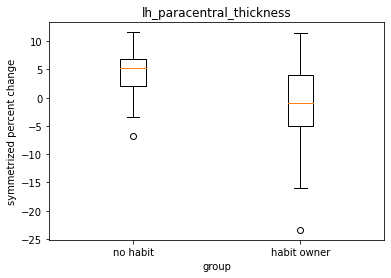

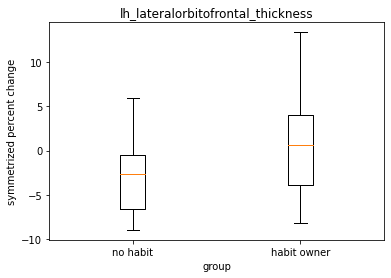

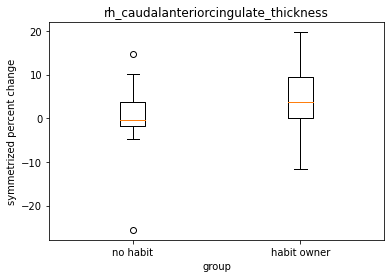

In [11]:
from scipy import stats
#
# t-test
#
ttest_result_df = pd.DataFrame(index=[], columns=['spc', 'pval'])
for ii in range(df_result.columns.get_loc('lh_bankssts_thickness'),df_result.columns.get_loc('rh_MeanThickness_thickness')+1):
    ttest_A=df_result.loc[(df_result['運動習慣'] == 0),df_result.columns[ii]]
    ttest_B=df_result.loc[(df_result['運動習慣'] == 1),df_result.columns[ii]]
#    print(ttest_A.shape, ttest_A.head(5))
#    print(ttest_B.shape, ttest_B.head(5))
    ttest_result=stats.ttest_ind(ttest_A,ttest_B)
    #ttest_result=stats.ttest_rel(ttest_A,ttest_B)
    ttest_result_df=ttest_result_df.append(pd.DataFrame([[df_result.columns[ii],ttest_result.pvalue]], columns=ttest_result_df.columns),ignore_index=True)
print(ttest_result_df.sort_values('pval'))

#plot
import matplotlib.pyplot as plt
from statistics import mean, median,variance,stdev

for jj in range(3):
    minspcname=ttest_result_df.sort_values('pval')['spc'].reset_index(drop=True)[jj]
    ttest_A=df_result.loc[(df_result['運動習慣'] == 0),minspcname]
    ttest_B=df_result.loc[(df_result['運動習慣'] == 1),minspcname]
    print(minspcname,"no habit",mean(ttest_A),stdev(ttest_A))
    print(minspcname,"habit owner",mean(ttest_B),stdev(ttest_B))
    """
    print(ttest_A)
    print(ttest_B)
    """
    #plot
    fig,ax=plt.subplots()
    ax.boxplot([ttest_A,ttest_B],labels=["no habit","habit owner"])
    plt.title(minspcname)
    plt.ylabel("symmetrized percent change")
    plt.xlabel("group")
    plt.savefig(IMPACT_CWD+"g2_ttest_figure_"+str(jj+1)+".png")

                                     spc                 pval
10     lh_lateralorbitofrontal_thickness  0.05869088674221563
15              lh_paracentral_thickness  0.06329203997615862
13           lh_middletemporal_thickness  0.12755983407843868
37  rh_caudalanteriorcingulate_thickness  0.14649019376567005
19            lh_pericalcarine_thickness   0.1701191210737609
..                                   ...                  ...
17            lh_parsorbitalis_thickness   0.9055820076472213
28         lh_superiortemporal_thickness   0.9230798334649721
67             rh_temporalpole_thickness   0.9344162460217044
32       lh_transversetemporal_thickness    0.947332467710423
61     rh_rostralmiddlefrontal_thickness   0.9522663679711688

[71 rows x 2 columns]

lh_lateralorbitofrontal_thickness
                                    OLS Regression Results                                   
Dep. Variable:     lh_lateralorbitofrontal_thickness   R-squared:                       0.076
Model:    

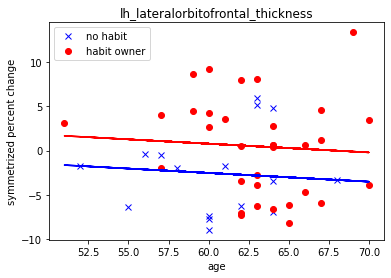

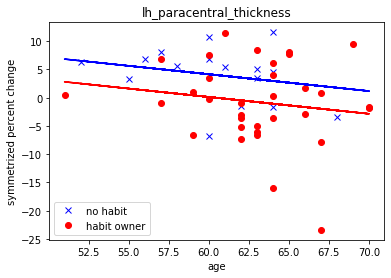

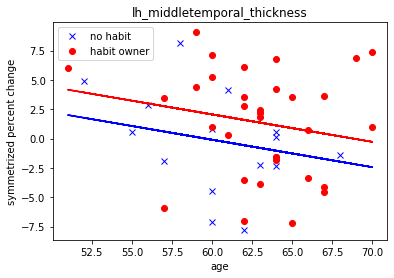

In [12]:
from statsmodels.formula.api import ols
#
# f-test
#
df_result['n運動習慣'] = 0
df_result.loc[(df_result['運動習慣'] == 0),'n運動習慣'] = 1

ftest_result_df = pd.DataFrame(index=[], columns=['spc', 'pval'])
for ii in range(df_result.columns.get_loc('lh_bankssts_thickness'),df_result.columns.get_loc('rh_MeanThickness_thickness')+1):
    ftest_A=df_result.loc[:,['年齢_bl','運動習慣','n運動習慣',df_result.columns[ii]]]
    #print(ftest_A.head())
    model=ols(df_result.columns[ii]+' ~ 運動習慣 + n運動習慣 + 年齢_bl', ftest_A).fit()
    #print(model.summary())
    ftest_result=model.f_test([0, 1, -1, 0])
    ftest_result_df=ftest_result_df.append(pd.DataFrame([[df_result.columns[ii],ftest_result.pvalue]], columns=ttest_result_df.columns),ignore_index=True)
print(ftest_result_df.sort_values('pval'))

for jj in range(3):
    minspcname=ftest_result_df.sort_values('pval')['spc'].reset_index(drop=True)[jj]
    #print(minspcname)
    ftest_A=df_result.loc[:,['年齢_bl','運動習慣','n運動習慣',minspcname]]
    model=ols(minspcname+' ~ 運動習慣 + n運動習慣 + 年齢_bl', ftest_A).fit()
    """
    ftest_A=df_result.loc[:,['n運動習慣','運動習慣','n年齢_bl','e年齢_bl',minspcname]]
    model=ols(minspcname+' ~ n運動習慣 + 運動習慣 + n年齢_bl + e年齢_bl', ftest_A).fit()
    """
    print("")
    print(minspcname)
    print(model.summary())
    
    #plot
    ftest_B=df_result.loc[(df_result['運動習慣'] == 0),['年齢_bl',minspcname]]
    ftest_C=df_result.loc[(df_result['運動習慣'] == 1),['年齢_bl',minspcname]]
    plt.figure()
    plt.plot(ftest_B['年齢_bl'],ftest_B[minspcname], color="b", label="no habit",marker="x", linestyle='None')
    plt.plot(ftest_C['年齢_bl'],ftest_C[minspcname], color="r", label="habit owner",marker="o", linestyle='None')
    #print(model.params["Intercept"])
    plt.plot(df_result['年齢_bl'],model.params["Intercept"]+model.params["n運動習慣"]+df_result['年齢_bl']*model.params["年齢_bl"], color="b")
    plt.plot(df_result['年齢_bl'],model.params["Intercept"]+model.params["運動習慣"]+df_result['年齢_bl']*model.params["年齢_bl"], color="r")
    plt.title(minspcname)
    plt.ylabel("symmetrized percent change")
    plt.xlabel("age")
    plt.legend()
    plt.savefig(IMPACT_CWD+"g2_ftest_corr_figure_"+str(jj+1)+".png")

                                      spc                  pval
22                lh_precentral_thickness  0.042247471992017664
11                   lh_lingual_thickness   0.07878477654848347
14           lh_parahippocampal_thickness   0.09535579238553302
69                    rh_insula_thickness   0.14666864874032734
20               lh_postcentral_thickness   0.14700081339283916
..                                    ...                   ...
61      rh_rostralmiddlefrontal_thickness    0.9615945310728857
6           lh_inferiorparietal_thickness    0.9660109570872317
37   rh_caudalanteriorcingulate_thickness    0.9673704706090265
28          lh_superiortemporal_thickness    0.9907863312158696
24  lh_rostralanteriorcingulate_thickness    0.9990627556166152

[71 rows x 2 columns]

lh_precentral_thickness
                               OLS Regression Results                              
Dep. Variable:     lh_precentral_thickness   R-squared:                       0.128
Model:          

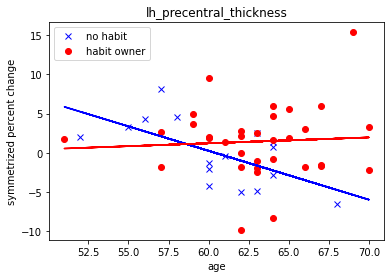

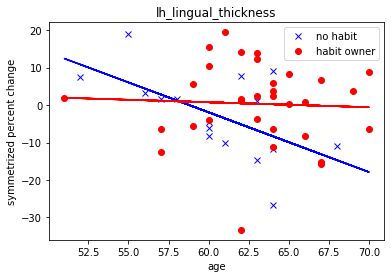

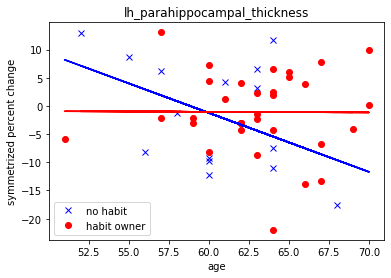

In [13]:
# different slope
df_result['n年齢_bl'] = 0
df_result['e年齢_bl'] = 0
df_result.loc[(df_result['運動習慣'] == 0),'n年齢_bl'] = df_result['年齢_bl']
df_result.loc[(df_result['運動習慣'] == 1),'e年齢_bl'] = df_result['年齢_bl']
#print(df_result.head())
ftest_result_df = pd.DataFrame(index=[], columns=['spc', 'pval'])
for ii in range(df_result.columns.get_loc('lh_bankssts_thickness'),df_result.columns.get_loc('rh_MeanThickness_thickness')+1):
    ftest_A=df_result.loc[:,['n運動習慣','運動習慣','n年齢_bl','e年齢_bl',df_result.columns[ii]]]
    model=ols(df_result.columns[ii]+' ~ n運動習慣 + 運動習慣 + n年齢_bl + e年齢_bl', ftest_A).fit()
    ftest_result=model.f_test([0, 0, 0, 1, -1])
    ftest_result_df=ftest_result_df.append(pd.DataFrame([[df_result.columns[ii],ftest_result.pvalue]], columns=ttest_result_df.columns),ignore_index=True)
print(ftest_result_df.sort_values('pval'))

# correlation
for jj in range(3):
    minspcname=ftest_result_df.sort_values('pval')['spc'].reset_index(drop=True)[jj]
    ftest_A=df_result.loc[:,['n運動習慣','運動習慣','n年齢_bl','e年齢_bl',minspcname]]
    model=ols(minspcname+' ~ n運動習慣 + 運動習慣 + n年齢_bl + e年齢_bl', ftest_A).fit()
    
    print("")
    print(minspcname)
    print(model.summary())
    #plot
    ftest_B=df_result.loc[(df_result['運動習慣'] == 0),['年齢_bl',minspcname]]
    ftest_C=df_result.loc[(df_result['運動習慣'] == 1),['年齢_bl',minspcname]]
    plt.figure()
    plt.plot(ftest_B['年齢_bl'],ftest_B[minspcname], color="b", label="no habit",marker="x", linestyle='None')
    plt.plot(ftest_C['年齢_bl'],ftest_C[minspcname], color="r", label="habit owner",marker="o", linestyle='None')
    #print(model.params["Intercept"])
    plt.plot(df_result['年齢_bl'],model.params["Intercept"]+model.params["n運動習慣"]+df_result['年齢_bl']*model.params["n年齢_bl"], color="b")
    plt.plot(df_result['年齢_bl'],model.params["Intercept"]+model.params["運動習慣"]+df_result['年齢_bl']*model.params["e年齢_bl"], color="r")
    plt.title(minspcname)
    plt.ylabel("symmetrized percent change")
    plt.xlabel("age")
    plt.legend()
    plt.savefig(IMPACT_CWD+"g2_dods_corr_figure_"+str(jj+1)+".png")

## 3 group

                                 spc      pval
43     rh_inferiortemporal_thickness  0.025037
68   rh_transversetemporal_thickness  0.050407
15          lh_paracentral_thickness  0.076809
63     rh_superiorparietal_thickness  0.103095
67         rh_temporalpole_thickness  0.103287
..                               ...       ...
62      rh_superiorfrontal_thickness  0.942822
41             rh_fusiform_thickness  0.948851
34        lh_MeanThickness_thickness  0.971634
48  rh_medialorbitofrontal_thickness  0.977893
26      lh_superiorfrontal_thickness  0.982572

[71 rows x 2 columns]
                                 spc group      pval
129    rh_inferiortemporal_thickness  high  0.018594
206  rh_transversetemporal_thickness  none  0.043118
201        rh_temporalpole_thickness  high  0.085789
46          lh_paracentral_thickness   low  0.087085
190    rh_superiorparietal_thickness   low  0.112481
..                               ...   ...       ...
155         rh_paracentral_thickness  none

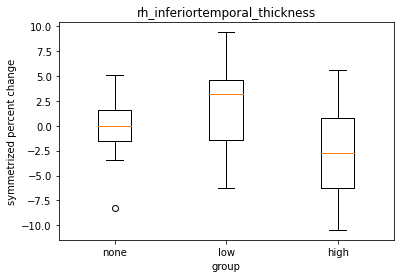

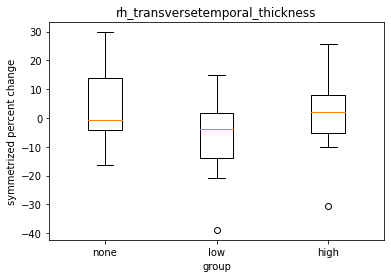

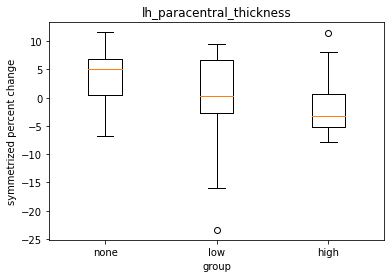

In [14]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

ftest_result_df = pd.DataFrame(index=[], columns=['spc', 'pval'])
tktest_result_df = pd.DataFrame(index=[], columns=['spc', 'group', 'pval'])
for ii in range(df_result.columns.get_loc('lh_bankssts_thickness'),df_result.columns.get_loc('rh_MeanThickness_thickness')+1):
    ftest_A=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 0),df_result.columns[ii]]
    ftest_B=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 1),df_result.columns[ii]]
    ftest_C=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 2),df_result.columns[ii]]

    # f test
    ftest_result=stats.f_oneway(ftest_A,ftest_B,ftest_C)
    ftest_result_df=ftest_result_df.append(pd.DataFrame([[df_result.columns[ii],ftest_result.pvalue]], columns=ftest_result_df.columns),ignore_index=True)
    
    # tukey test
    ftest_ABC=pd.concat([ftest_A, ftest_B, ftest_C])
    ftest_I=['none' for _ in range(ftest_A.shape[0])]+['low' for _ in range(ftest_B.shape[0])]+['high' for _ in range(ftest_C.shape[0])]
    temptkresult=vars(pairwise_tukeyhsd(ftest_ABC, ftest_I))
    tktest_result_df=tktest_result_df.append(pd.DataFrame([[df_result.columns[ii], temptkresult['groupsunique'][0], temptkresult['pvalues'][0]]], columns=tktest_result_df.columns),ignore_index=True)
    tktest_result_df=tktest_result_df.append(pd.DataFrame([[df_result.columns[ii], temptkresult['groupsunique'][1], temptkresult['pvalues'][1]]], columns=tktest_result_df.columns),ignore_index=True)
    tktest_result_df=tktest_result_df.append(pd.DataFrame([[df_result.columns[ii], temptkresult['groupsunique'][2], temptkresult['pvalues'][2]]], columns=tktest_result_df.columns),ignore_index=True)

print(ftest_result_df.sort_values('pval'))
#
print(tktest_result_df.sort_values('pval'))
#
import numpy as np
# 2 group tukey test in SPC with min p-value
for jj in range(3):
    minspcname=ftest_result_df.sort_values('pval')['spc'].reset_index(drop=True)[jj]
    ii=df_result.columns.get_loc(minspcname)
    """ftest_A=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 0),df_result.columns[ii]]
    ftest_B=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 1),df_result.columns[ii]]
    ftest_C=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 2),df_result.columns[ii]]"""
    ftest_A=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 0),minspcname]
    ftest_B=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 1),minspcname]
    ftest_C=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 2),minspcname]
    ftest_ABC=pd.concat([ftest_A, ftest_B, ftest_C])
    ftest_I=['none' for _ in range(ftest_A.shape[0])]+['low' for _ in range(ftest_B.shape[0])]+['high' for _ in range(ftest_C.shape[0])]
    print("")
    print(minspcname)
    print(pairwise_tukeyhsd(ftest_ABC, ftest_I))
    #plot
    fig,ax=plt.subplots()
    ax.boxplot([ftest_A,ftest_B,ftest_C],labels=["none","low","high"])
    plt.title(minspcname)
    plt.ylabel("symmetrized percent change")
    plt.xlabel("group")
    plt.savefig(IMPACT_CWD+"g3_figure_"+str(jj+1)+".png")

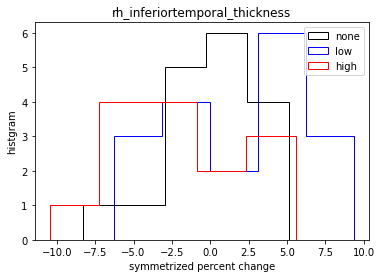

In [15]:
"""
#plot
minspcname=ftest_result_df.sort_values('pval')['spc'].reset_index(drop=True)[0]
ftest_A=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 0),['年齢_bl',minspcname]]
ftest_B=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 1),['年齢_bl',minspcname]]
ftest_C=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 2),['年齢_bl',minspcname]]
plt.plot(ftest_A['年齢_bl'],ftest_A[minspcname], color="k", label="none",marker="x", linestyle='None')
plt.plot(ftest_B['年齢_bl'],ftest_B[minspcname], color="b", label="low",marker="^", linestyle='None')
plt.plot(ftest_C['年齢_bl'],ftest_C[minspcname], color="r", label="high",marker="o", linestyle='None')
plt.title(minspcname)
plt.ylabel("symmetrized percent change")
plt.xlabel("age")
plt.legend()
plt.savefig('ageplot_figure.png')

#rh_cuneus_thickness
plt.figure()
minspcname="rh_cuneus_thickness"
ftest_A=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 0),['年齢_bl',minspcname]]
ftest_B=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 1),['年齢_bl',minspcname]]
ftest_C=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 2),['年齢_bl',minspcname]]
plt.plot(ftest_A['年齢_bl'],ftest_A[minspcname], color="k", label="none",marker="x", linestyle='None')
plt.plot(ftest_B['年齢_bl'],ftest_B[minspcname], color="b", label="low",marker="^", linestyle='None')
plt.plot(ftest_C['年齢_bl'],ftest_C[minspcname], color="r", label="high",marker="o", linestyle='None')
plt.title(minspcname)
plt.ylabel("symmetrized percent change")
plt.xlabel("age")
plt.legend()
plt.savefig('ageplot2_figure.png')
"""

plt.figure()
minspcname=ftest_result_df.sort_values('pval')['spc'].reset_index(drop=True)[0]
ftest_A=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 0),minspcname]
ftest_B=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 1),minspcname]
ftest_C=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 2),minspcname]
plt.hist(ftest_A, bins=5, histtype="step", color="k", label="none")
plt.hist(ftest_B, bins=5, histtype="step", color="b", label="low")
plt.hist(ftest_C, bins=5, histtype="step", color="r", label="high")
plt.title(minspcname)
plt.xlabel("symmetrized percent change")
plt.ylabel("histgram")
plt.legend()
plt.savefig(IMPACT_CWD+'f_figure.png')

In [16]:
from statsmodels.formula.api import ols

df_result['n運動習慣'] = 0
df_result['l運動習慣'] = 0
df_result['h運動習慣'] = 0
df_result.loc[(df_result['運動習慣_あり_運動時間'] == 0),'n運動習慣'] = 1
df_result.loc[(df_result['運動習慣_あり_運動時間'] == 1),'l運動習慣'] = 1
df_result.loc[(df_result['運動習慣_あり_運動時間'] == 2),'h運動習慣'] = 1
#print(df_result.head())
ftest_result_df = pd.DataFrame(index=[], columns=['spc', 'pval'])
for ii in range(df_result.columns.get_loc('lh_bankssts_thickness'),df_result.columns.get_loc('rh_MeanThickness_thickness')+1):
    ftest_A=df_result.loc[:,['年齢_bl','n運動習慣','l運動習慣','h運動習慣',df_result.columns[ii]]]
    #print(ftest_A.head())
    model=ols(df_result.columns[ii]+' ~ n運動習慣 + l運動習慣 + h運動習慣 + 年齢_bl', ftest_A).fit()
    #print(model.summary())
    ftest_result=model.f_test([0, 1, -0.5, -0.5, 0])
    ftest_result_df=ftest_result_df.append(pd.DataFrame([[df_result.columns[ii]+"_n",ftest_result.pvalue]], columns=ttest_result_df.columns),ignore_index=True)
    ftest_result=model.f_test([0, -0.5, 1, -0.5, 0])
    ftest_result_df=ftest_result_df.append(pd.DataFrame([[df_result.columns[ii]+"_l",ftest_result.pvalue]], columns=ttest_result_df.columns),ignore_index=True)
    ftest_result=model.f_test([0, -0.5, -0.5, 1, 0])
    ftest_result_df=ftest_result_df.append(pd.DataFrame([[df_result.columns[ii]+"_h",ftest_result.pvalue]], columns=ttest_result_df.columns),ignore_index=True)
print(ftest_result_df.sort_values('pval'))

                                   spc                  pval
131    rh_inferiortemporal_thickness_h  0.016340501427901895
130    rh_inferiortemporal_thickness_l  0.026372173633646474
205  rh_transversetemporal_thickness_l   0.03020683478244202
191    rh_superiorparietal_thickness_h    0.0647962726960264
202        rh_temporalpole_thickness_l   0.06936197260960121
..                                 ...                   ...
71            lh_precuneus_thickness_h    0.9865619031638825
123            rh_fusiform_thickness_n    0.9874153484594554
27     lh_lateraloccipital_thickness_n    0.9921081029079771
151     rh_parahippocampal_thickness_l    0.9961002619701459
210       rh_MeanThickness_thickness_n    0.9992240861113699

[213 rows x 2 columns]



lh_lateraloccipital_thickness
                                  OLS Regression Results                                 
Dep. Variable:     lh_lateraloccipital_thickness   R-squared:                       0.316
Model:                                       OLS   Adj. R-squared:                  0.236
Method:                            Least Squares   F-statistic:                     3.970
Date:                           Mon, 01 Jun 2020   Prob (F-statistic):            0.00476
Time:                                   14:34:13   Log-Likelihood:                -146.14
No. Observations:                             49   AIC:                             304.3
Df Residuals:                                 43   BIC:                             315.6
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

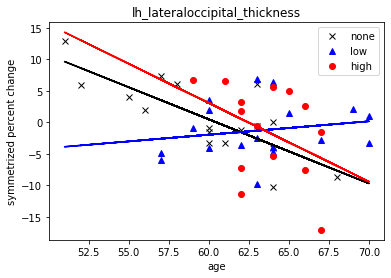

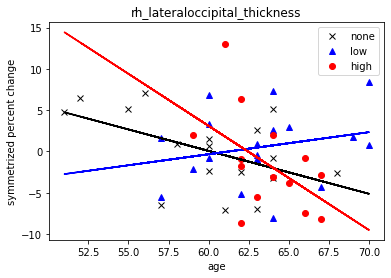

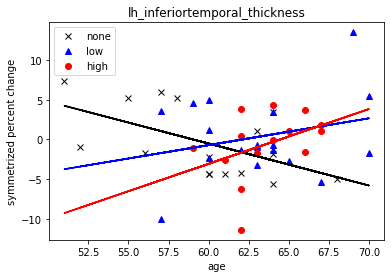

In [17]:
# different slope
df_result['n年齢_bl'] = 0
df_result['l年齢_bl'] = 0
df_result['h年齢_bl'] = 0
df_result.loc[(df_result['運動習慣_あり_運動時間'] == 0),'n年齢_bl'] = df_result['年齢_bl']
df_result.loc[(df_result['運動習慣_あり_運動時間'] == 1),'l年齢_bl'] = df_result['年齢_bl']
df_result.loc[(df_result['運動習慣_あり_運動時間'] == 2),'h年齢_bl'] = df_result['年齢_bl']
#print(df_result.head())
ftest_result_df = pd.DataFrame(index=[], columns=['spc', 'pval'])
for ii in range(df_result.columns.get_loc('lh_bankssts_thickness'),df_result.columns.get_loc('rh_MeanThickness_thickness')+1):
    ftest_A=df_result.loc[:,['n運動習慣','l運動習慣','h運動習慣','n年齢_bl','l年齢_bl','h年齢_bl',df_result.columns[ii]]]
    model=ols(df_result.columns[ii]+' ~ n運動習慣 + l運動習慣 + h運動習慣 + n年齢_bl + l年齢_bl + h年齢_bl', ftest_A).fit()
    ftest_result=model.f_test([0, 0, 0, 0, 1, -0.5, -0.5])
    ftest_result_df=ftest_result_df.append(pd.DataFrame([[df_result.columns[ii]+"_n",ftest_result.pvalue]], columns=ttest_result_df.columns),ignore_index=True)
    ftest_result=model.f_test([0, 0, 0, 0, -0.5, 1, -0.5])
    ftest_result_df=ftest_result_df.append(pd.DataFrame([[df_result.columns[ii]+"_l",ftest_result.pvalue]], columns=ttest_result_df.columns),ignore_index=True)
    ftest_result=model.f_test([0, 0, 0, 0, -0.5, -0.5, 1])
    ftest_result_df=ftest_result_df.append(pd.DataFrame([[df_result.columns[ii]+"_h",ftest_result.pvalue]], columns=ttest_result_df.columns),ignore_index=True)
#print(ftest_result_df.sort_values('pval'))

# correlation
for jj in range(3):
    minspcname=ftest_result_df.sort_values('pval')['spc'].reset_index(drop=True)[jj]
    """ftest_A=df_result.loc[:,['n運動習慣','l運動習慣','h運動習慣','n年齢_bl','l年齢_bl','h年齢_bl',df_result.columns[ii]]]
    model=ols(df_result.columns[ii]+' ~ n運動習慣 + l運動習慣 + h運動習慣 + n年齢_bl + l年齢_bl + h年齢_bl', ftest_A).fit()"""
    minspcname=minspcname[:-2] # -2 for "_x"
    ftest_A=df_result.loc[:,['n運動習慣','l運動習慣','h運動習慣','n年齢_bl','l年齢_bl','h年齢_bl',minspcname]]
    model=ols(minspcname+' ~ n運動習慣 + l運動習慣 + h運動習慣 + n年齢_bl + l年齢_bl + h年齢_bl', ftest_A).fit()
    
    print("")
    print(minspcname)
    print(model.summary())
    #plot
    ftest_A=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 0),['年齢_bl',minspcname]]
    ftest_B=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 1),['年齢_bl',minspcname]]
    ftest_C=df_result.loc[(df_result['運動習慣_あり_運動時間'] == 2),['年齢_bl',minspcname]]
    plt.figure()
    plt.plot(ftest_A['年齢_bl'],ftest_A[minspcname], color="k", label="none",marker="x", linestyle='None')
    plt.plot(ftest_B['年齢_bl'],ftest_B[minspcname], color="b", label="low",marker="^", linestyle='None')
    plt.plot(ftest_C['年齢_bl'],ftest_C[minspcname], color="r", label="high",marker="o", linestyle='None')
    #print(model.params["Intercept"])
    plt.plot(df_result['年齢_bl'],model.params["Intercept"]+model.params["n運動習慣"]+df_result['年齢_bl']*model.params["n年齢_bl"], color="k")
    plt.plot(df_result['年齢_bl'],model.params["Intercept"]+model.params["l運動習慣"]+df_result['年齢_bl']*model.params["l年齢_bl"], color="b")
    plt.plot(df_result['年齢_bl'],model.params["Intercept"]+model.params["h運動習慣"]+df_result['年齢_bl']*model.params["h年齢_bl"], color="r")
    plt.title(minspcname)
    plt.ylabel("symmetrized percent change")
    plt.xlabel("age")
    plt.legend()
    plt.savefig(IMPACT_CWD+"dods_corr_figure_"+str(jj+1)+".png")

## correlation

In [18]:
#print(df_result)
corr_matp = df_result.corr(method='pearson')
#print(corr_matp)
corr_matp=corr_matp.dropna(how = 'all')
corr_matp=corr_matp.dropna(axis = 'columns')
corr_matp.to_csv(IMPACT_CWD+'spc_corr_matp.csv')

/home/s1613134/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36939 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/s1613134/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21205 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/s1613134/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/s1613134/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24931 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/s1613134/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/s1613134/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: 

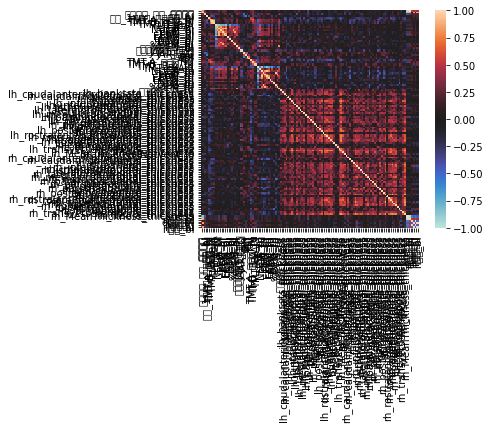

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matp,square=True,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=False, # True:格子の中に値を表示
#            fmt='.1f',
            xticklabels=corr_matp.columns.values,
            yticklabels=corr_matp.columns.values
           )
plt.show()
#fig = plt.figure(figsize=(10,10),dpi=200)
#fig.show()

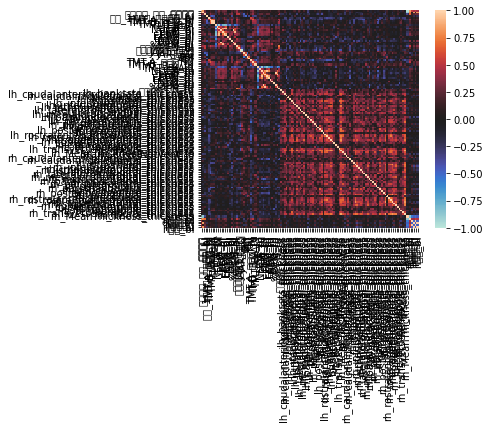

In [20]:
corr_mats = df_result.corr(method='spearman')
corr_mats=corr_mats.dropna(how = 'all')
corr_mats=corr_mats.dropna(axis = 'columns')
corr_mats.to_csv(IMPACT_CWD+'spc_corr_mats.csv')
sns.heatmap(corr_mats,square=True,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=False, # True:格子の中に値を表示
#            fmt='.1f',
            xticklabels=corr_mats.columns.values,
            yticklabels=corr_mats.columns.values
           )
plt.show()

In [21]:
#print(corr_matp)

In [22]:
#print(corr_mats)